In [1]:
# access to drive files
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
np.random.seed(0)

## Loading Datasets

In [4]:
corr_file = "../data/processed/corr.csv"
corr_df = pd.read_csv(corr_file, index_col=0)
corr_df

regulatorName   activeConformation  isNativeInactive  isPhosphorylated  \
0             GadW                 GadW             False             False   
1             GadW                 GadW             False             False   
2             GadW                 GadW             False             False   
3             GadX                 GadX             False             False   
4             GadX                 GadX             False             False   
...            ...                  ...               ...               ...   
2544          YiaU                 YiaU             False             False   
2545          CpxR  CpxR-phosphorylated              True              True   
2546          CpxR  CpxR-phosphorylated              True              True   
2547          CpxR  CpxR-phosphorylated              True              True   
2548          CpxR  CpxR-phosphorylated              True              True   

     regulatorGene targetGene  spearmanCorr        pValue   avgCorr   maxCorr  \
0             gadW       yhiD      0.709274  8.271010e-44  0.744624  0.836611   
1             gadW       hdeB      0.733069  4.114814e-48  0.744624  0.836611   
2             gadW       hdeA      0.722173  4.369899e-46  0.744624  0.836611   
3             gadX       yhiD      0.753694  3.103371e-52  0.754922  1.000000   
4             gadX       hdeB      0.776835  2.246342e-57  0.754922  1.000000   
...            ...        ...           ...           ...       ...       ...   
2544          yiaU       yiaV      0.379766  5.735174e-11  0.379766  0.379766   
2545          cpxR       carA     -0.068083  2.578980e-01  0.306216  1.000000   
2546          cpxR       carB      0.067037  2.653008e-01  0.306216  1.000000   
2547          cpxR       pflB      0.396485  6.680461e-12  0.306216  1.000000   
2548          cpxR       focA      0.164714  5.909184e-03  0.306216  1.000000   

       minCorr  
0     0.709274  
1     0.709274  
2     0.709274  
3    -0.137443  
4    -0.137443  
...        ...  
2544  0.379766  
2545 -0.432814  
2546 -0.432814  
2547 -0.432814  
2548 -0.432814  

[2549 rows x 11 columns]

## Plot Correlations

<Axes: title={'center': 'spearmanCorr'}, xlabel='isNativeInactive'>

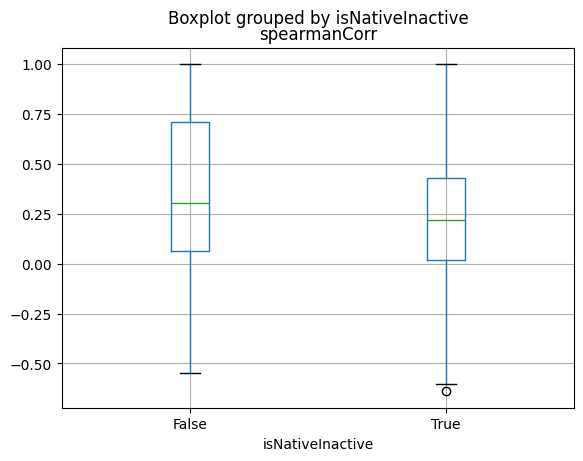

In [7]:
corr_df.boxplot("spearmanCorr", by="isNativeInactive")

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

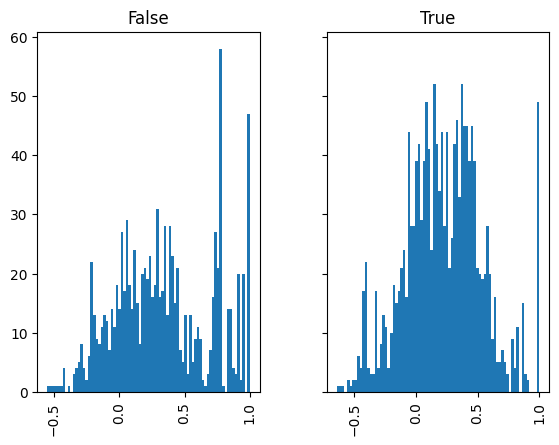

In [9]:
corr_df.hist(column="spearmanCorr",
             by="isNativeInactive",
             sharey=True, bins=80)

Notes:
* There is quite a bit of self-regulation, where regulator and regulated target are the same: they will obviously have correlation = 1.0
* There is a weird peak in the non-modified transcription factors histogram at correlation ~ 0.7

First of all, let's filter out the self-regulating genes.

In [12]:
filtered_corr_df = corr_df[corr_df["regulatorGene"] != corr_df["targetGene"]]

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

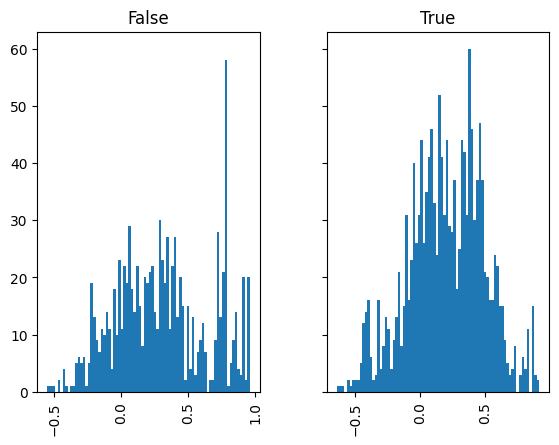

In [13]:
# plot new histograms
filtered_corr_df.hist(column="spearmanCorr",
                      by="isNativeInactive",
                      sharey=True, bins=80)

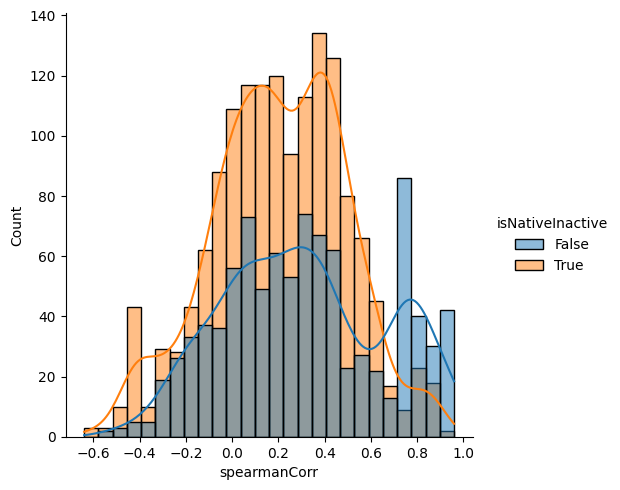

In [14]:
sns.displot(data=filtered_corr_df,
            x="spearmanCorr", hue="isNativeInactive", kde=True)

It makes more sense! Now let's analyze the weird peak at correlation ~ 0.7

In [15]:
peak = corr_df[corr_df["isNativeInactive"] == False]
peak = peak[peak["spearmanCorr"] > 0.575]
peak = peak[peak["spearmanCorr"] < 0.75]
peak

regulatorName activeConformation  isNativeInactive  isPhosphorylated  \
0             GadW               GadW             False             False   
1             GadW               GadW             False             False   
2             GadW               GadW             False             False   
161           McbR               McbR             False             False   
164           McbR               McbR             False             False   
...            ...                ...               ...               ...   
2397          IscR               IscR             False             False   
2398          IscR               IscR             False             False   
2399          IscR               IscR             False             False   
2400          IscR               IscR             False             False   
2401          IscR               IscR             False             False   

     regulatorGene targetGene  spearmanCorr        pValue   avgCorr   maxCorr  \
0             gadW       yhiD      0.709274  8.271010e-44  0.744624  0.836611   
1             gadW       hdeB      0.733069  4.114814e-48  0.744624  0.836611   
2             gadW       hdeA      0.722173  4.369899e-46  0.744624  0.836611   
161           mcbR       yciG      0.634712  9.435518e-33  0.678234  0.854619   
164           mcbR       yciG      0.634712  9.435518e-33  0.678234  0.854619   
...            ...        ...           ...           ...       ...       ...   
2397          iscR       sufS      0.582278  1.248553e-26  0.606830  0.745225   
2398          iscR       sufD      0.604582  4.272130e-29  0.606830  0.745225   
2399          iscR       sufC      0.617224  1.395779e-30  0.606830  0.745225   
2400          iscR       sufB      0.623688  2.283743e-31  0.606830  0.745225   
2401          iscR       sufA      0.587887  3.120479e-27  0.606830  0.745225   

       minCorr  
0     0.709274  
1     0.709274  
2     0.709274  
161   0.205606  
164   0.205606  
...        ...  
2397  0.499528  
2398  0.499528  
2399  0.499528  
2400  0.499528  
2401  0.499528  

[85 rows x 11 columns]

In [16]:
# forse dovremmo studiare questi geni?
print("TFs:", peak.regulatorGene.unique())
print("targets:", peak.targetGene.unique())

# RICORDA: gene_data_df ha delle colonne con Gene Ontology Terms

TFs: ['gadW' 'mcbR' 'mlrA' 'iscR' 'csgD' 'rob' 'gadE' 'glaR' 'cdaR' 'soxS'
 'tdcA' 'marA' 'norR']
targets: ['yhiD' 'hdeB' 'hdeA' 'yciG' 'csgD' 'nrdH' 'nrdI' 'nrdF' 'nrdE' 'gadA'
 'gadC' 'gadB' 'mdtF' 'mdtE' 'yccT' 'glnD' 'yjbR' 'yjbQ' 'yidB' 'garP'
 'nfo' 'sodA' 'tdcB' 'marR' 'norV' 'garD' 'gudP' 'sufS' 'sufD' 'sufC'
 'sufB' 'sufA' 'selO']


## Statistical Tests

In [20]:
# define distributions
# x for active native protein
# y for inactive native protein

x = filtered_corr_df[filtered_corr_df["isNativeInactive"] == True]["spearmanCorr"]
y = filtered_corr_df[filtered_corr_df["isNativeInactive"] == False]["spearmanCorr"]

In [21]:
# ANOVA
stats.f_oneway(x, y)

F_onewayResult(statistic=66.8575889663584, pvalue=4.628476941834681e-16)

In [25]:
stats.ttest_ind(x, y)

TtestResult(statistic=-8.176649005941151, pvalue=4.628476941840797e-16, df=2451.0)

In [22]:
# KS test, paragone con una normale
stats.kstest(x, stats.norm.cdf)

KstestResult(statistic=0.3379195859318188, pvalue=3.200369829577321e-154, statistic_location=-0.1948786534319227, statistic_sign=-1)

In [23]:
# KS test, paragone con una normale
stats.kstest(y, stats.norm.cdf)

KstestResult(statistic=0.3682592757273042, pvalue=2.521771409113589e-115, statistic_location=-0.2177546940231128, statistic_sign=-1)

In [24]:
# KS test, paragone tra loro
stats.kstest(x, y)

KstestResult(statistic=0.18376043175972415, pvalue=1.2838915266815041e-17, statistic_location=0.7081549618979346, statistic_sign=1)

In [26]:
# F test
# Calculate the sample variances
variance1 = np.var(x, ddof=1)
variance2 = np.var(y, ddof=1)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
dof1 = len(x) - 1
dof2 = len(y) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, dof1, dof2)
 
# Print the results
print('Degree of freedom 1:',dof1)
print('Degree of freedom 2:',dof2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 1508
Degree of freedom 2: 943
F-statistic: 0.7006049676675978
p-value: 4.349580128102118e-10


## Plot Aggregate Correlations

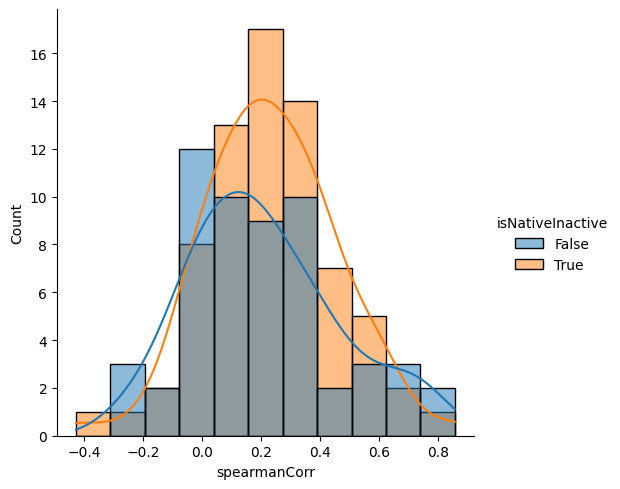

In [29]:
data = filtered_corr_df.groupby(by=["regulatorGene"])[["spearmanCorr"]].mean()
data = data.merge(filtered_corr_df[["regulatorGene", "isNativeInactive"]],
                  on=["regulatorGene"]).drop_duplicates()

sns.displot(data=data, x="spearmanCorr", hue="isNativeInactive", kde=True)

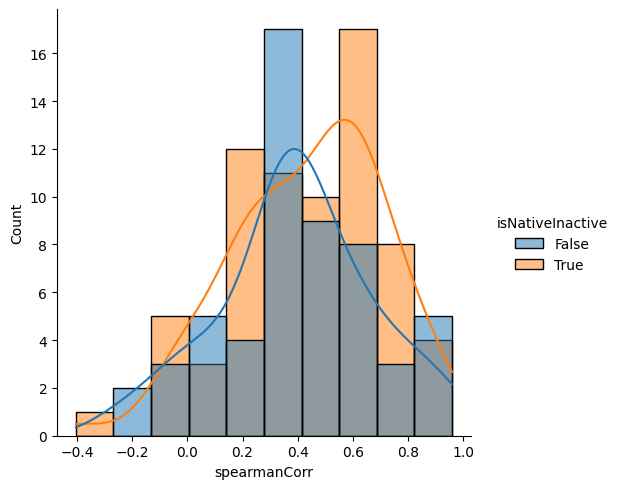

In [30]:
data = filtered_corr_df.groupby(by=["regulatorGene"])[["spearmanCorr"]].max()
data = data.merge(filtered_corr_df[["regulatorGene", "isNativeInactive"]],
                  on=["regulatorGene"]).drop_duplicates()

sns.displot(data=data, x="spearmanCorr", hue="isNativeInactive", kde=True)

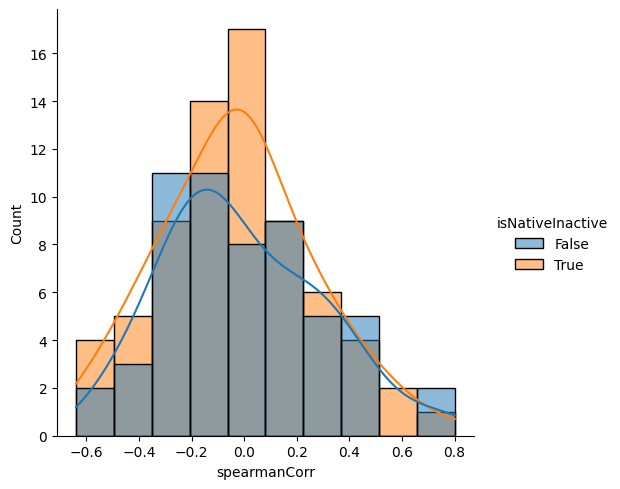

In [31]:
data = filtered_corr_df.groupby(by=["regulatorGene"])[["spearmanCorr"]].min()
data = data.merge(filtered_corr_df[["regulatorGene", "isNativeInactive"]],
                  on=["regulatorGene"]).drop_duplicates()

sns.displot(data=data, x="spearmanCorr", hue="isNativeInactive", kde=True)

## Classification Based on Correlation

In [59]:
from sklearn.preprocessing import StandardScaler
X = corr_df[["spearmanCorr", "avgCorr", "maxCorr", "minCorr", "isNativeInactive"]]
y = X["isNativeInactive"].to_numpy()
X = X.drop("isNativeInactive", axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

model = LinearSVC(fit_intercept=True,
                  penalty="l1",
                  max_iter=8000,
                  dual=False)
scores = cross_val_score(model, 
                         X,
                         y,
                         scoring="roc_auc",
                         cv=5)

np.mean(scores)

0.5739949178810486

In [62]:
from sklearn.preprocessing import StandardScaler
X = corr_df[["spearmanCorr", "avgCorr", "maxCorr", "minCorr", "isPhosphorylated"]]
y = X["isPhosphorylated"].to_numpy()
X = X.drop("isPhosphorylated", axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

model = LinearSVC(fit_intercept=True,
                  penalty="l1",
                  max_iter=8000,
                  dual=False)
scores = cross_val_score(model, 
                         X,
                         y,
                         scoring="roc_auc",
                         cv=5)

np.mean(scores)

0.6710026446704648